In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder

In [3]:
df= pd.read_csv(r'Smoking_Cancer_Clean_4000rows.csv')
df

,Patient_ID,AGE,GENDER,SMOKING_STATUS,CIGARETTES_PER_DAY,YEARS_SMOKING,EXPOSURE_TO_SECONDHAND_SMOKE,ALCOHOL_CONSUMPTION,BMI,PHYSICAL_ACTIVITY_LEVEL,LUNG_CANCER,SURVIVAL_YEARS
0,1,63,M,Former,28,38,No,Yes,32.2,Moderate,Yes,2.5
1,2,76,M,Current,30,3,No,No,25.4,High,No,9.9
2,3,53,F,Former,24,34,No,Yes,18.1,Low,Yes,6.7
3,4,39,F,Current,23,46,No,Yes,32.9,High,Yes,2.9
4,5,67,F,Never,18,35,No,No,32.9,Moderate,No,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,54,F,Former,38,5,Yes,Yes,18.3,Low,No,2.6
3996,3997,57,M,Former,9,45,No,No,30.4,Low,No,4.0
3997,3998,60,M,Current,16,32,No,Yes,30.1,High,No,8.4
3998,3999,42,M,Former,6,48,No,No,29.1,Low,No,6.3


In [6]:
#Risk Score simplifié
df['RISK_SCORE'] = df['AGE']*0.2 + df['CIGARETTES_PER_DAY']*0.5 + df['BMI']*0.1


In [7]:
# Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression

# Example dataset (you can replace it with your real data)




# Define features (X) and target (y)
X = df[["AGE", "CIGARETTES_PER_DAY", "BMI"]]
y = df["RISK_SCORE"]

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Extract coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print("Model Coefficients:")
print("AGE coefficient:", coefficients[0])
print("CIGARETTES_PER_DAY coefficient:", coefficients[1])
print("BMI coefficient:", coefficients[2])
print("Intercept:", intercept)


Model Coefficients:
AGE coefficient: 0.19999999999999993
CIGARETTES_PER_DAY coefficient: 0.49999999999999967
BMI coefficient: 0.10000000000000003
Intercept: 7.105427357601002e-15


In [53]:
df['LUNG_CANCER_BIN'] = df['LUNG_CANCER'].map({'Yes':1, 'No':0})
df = df.dropna(subset=['LUNG_CANCER_BIN','RISK_SCORE'])


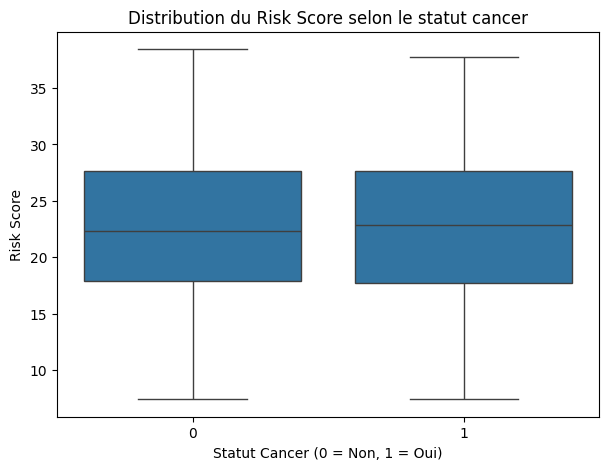

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.boxplot(x='LUNG_CANCER_BIN', y='RISK_SCORE', data=df)
plt.xlabel("Statut Cancer (0 = Non, 1 = Oui)")
plt.ylabel("Risk Score")
plt.title("Distribution du Risk Score selon le statut cancer")
plt.show()


# VARIABBLE COMPOSITE

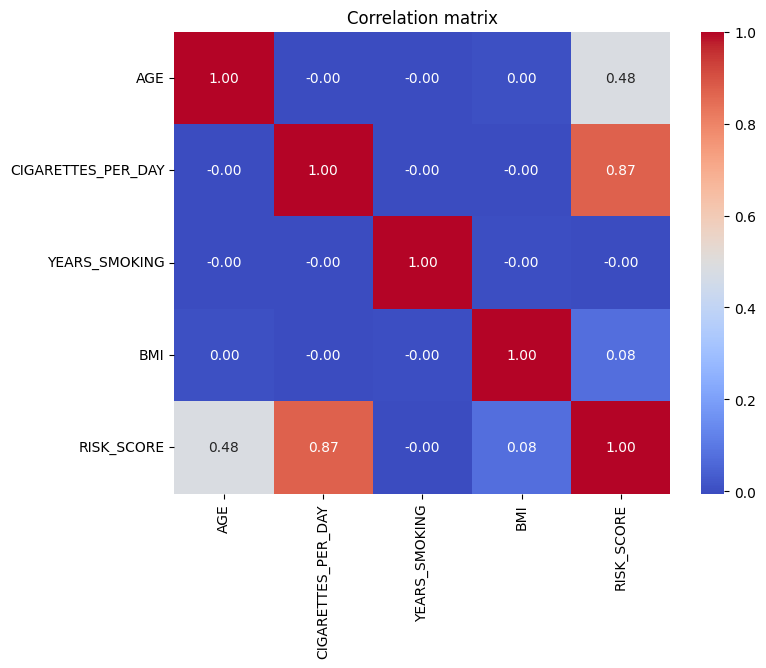

In [59]:
import numpy as np

quant_vars = ['AGE','CIGARETTES_PER_DAY','YEARS_SMOKING','BMI','RISK_SCORE']
corr_matrix = df[quant_vars].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix")
plt.show()

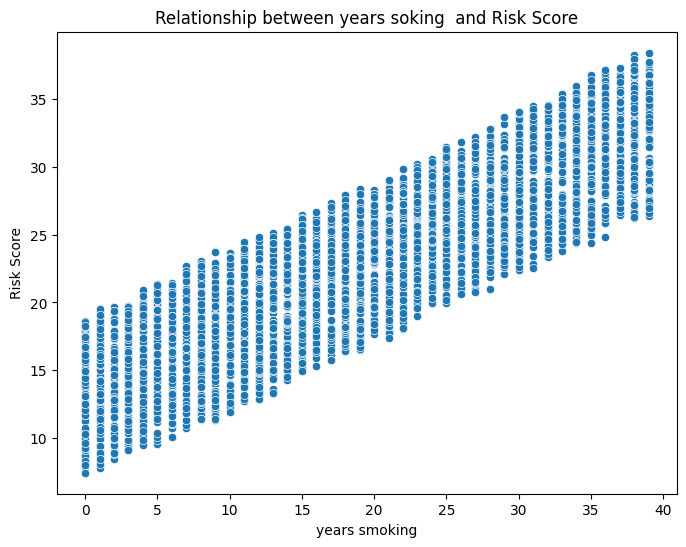

In [61]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='CIGARETTES_PER_DAY', y='RISK_SCORE', data=df)
plt.title('Relationship between CIGRATTE PER DAY  and Risk Score')
plt.xlabel('CIGRATTE PER DAY')
plt.ylabel('Risk Score')
plt.show()

#  1️⃣ Principe de la visualisation multivariée

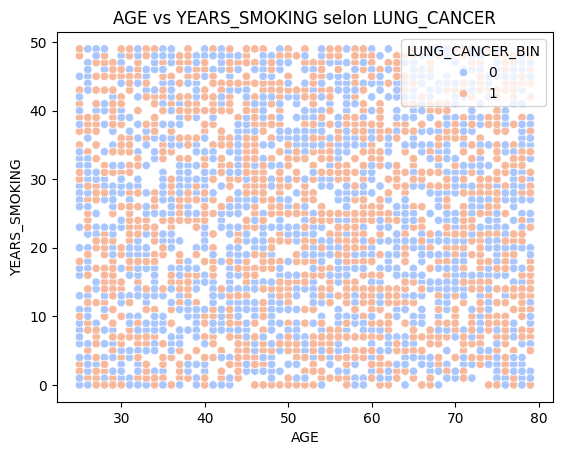

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot AGE vs YEARS_SMOKING avec couleur selon LUNG_CANCER
sns.scatterplot(
    data=df,
    x='AGE',
    y='YEARS_SMOKING',
    hue='LUNG_CANCER_BIN',  # 0 = No, 1 = Yes
    palette='coolwarm'
)
plt.title("AGE vs YEARS_SMOKING selon LUNG_CANCER")
plt.show()
